In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import keras
from PIL import Image
from keras.optimizers import Adam
from keras import layers
from keras.models import Sequential
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.applications import VGG16

Using TensorFlow backend.


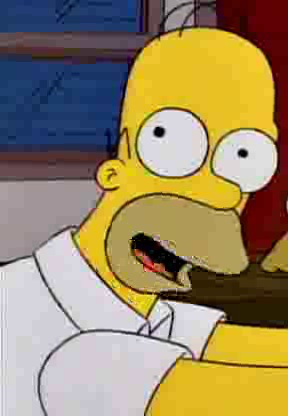

In [2]:
Image.open('/Users/andreashaggstrom/Downloads/Data Science/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_0015.jpg')

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,validation_split=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
training_set = train_datagen.flow_from_directory('/Users/andreashaggstrom/Downloads/Data Science/the-simpsons-characters-dataset/simpsons_dataset',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',color_mode="rgb")

Found 20933 images belonging to 47 classes.


In [5]:
val_set = train_datagen.flow_from_directory('/Users/andreashaggstrom/Downloads/Data Science/the-simpsons-characters-dataset/simpsons_dataset',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',color_mode="rgb",subset='validation')

Found 4169 images belonging to 47 classes.


In [6]:
test_set = test_datagen.flow_from_directory('/Users/andreashaggstrom/Downloads/Data Science/the-simpsons-characters-dataset/kaggle_simpson_testset',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical' ,color_mode="rgb", shuffle=False)

Found 990 images belonging to 47 classes.


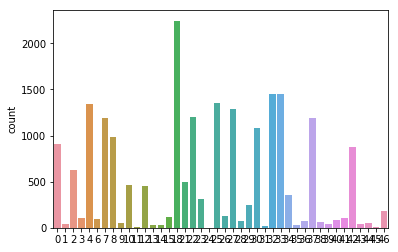

In [7]:
sns.countplot(training_set.classes)

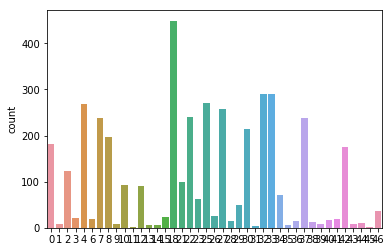

In [8]:
sns.countplot(val_set.classes)

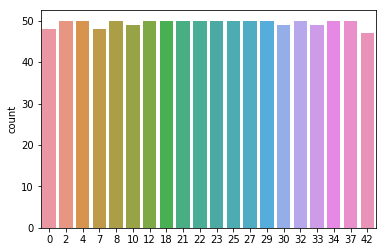

In [9]:
sns.countplot(test_set.classes)

In [10]:
base_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

In [11]:
base_model.trainable = False

In [12]:
model = Sequential()

In [13]:
model.add(base_model)

In [14]:
model.add(layers.Flatten())

In [15]:
model.add(layers.Dense(1024,activation='relu'))

In [16]:
model.add(layers.Dense(47,activation='softmax'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dense_2 (Dense)              (None, 47)                48175     
Total params: 23,152,495
Trainable params: 8,437,807
Non-trainable params: 14,714,688
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit_generator(training_set, steps_per_epoch=655, epochs=30, 
                              validation_data=val_set, validation_steps=131)

Epoch 1/30
655/655 [==============================] - 2838s 4s/step - loss: 1.6799 - acc: 0.5628 - val_loss: 1.1626 - val_acc: 0.6834
Epoch 2/30
655/655 [==============================] - 3524s 5s/step - loss: 1.0788 - acc: 0.7020 - val_loss: 0.9150 - val_acc: 0.7388
Epoch 3/30
655/655 [==============================] - 3249s 5s/step - loss: 0.8804 - acc: 0.7571 - val_loss: 0.9051 - val_acc: 0.7460
Epoch 4/30
655/655 [==============================] - 3502s 5s/step - loss: 0.7621 - acc: 0.7854 - val_loss: 0.7288 - val_acc: 0.7868
Epoch 5/30
655/655 [==============================] - 2757s 4s/step - loss: 0.6751 - acc: 0.8090 - val_loss: 0.6618 - val_acc: 0.7964
Epoch 6/30
655/655 [==============================] - 2749s 4s/step - loss: 0.6103 - acc: 0.8235 - val_loss: 0.5531 - val_acc: 0.8355
Epoch 7/30
655/655 [==============================] - 2750s 4s/step - loss: 0.5352 - acc: 0.8400 - val_loss: 0.4747 - val_acc: 0.8616
Epoch 8/30
655/655 [==============================] - 2750s 4s

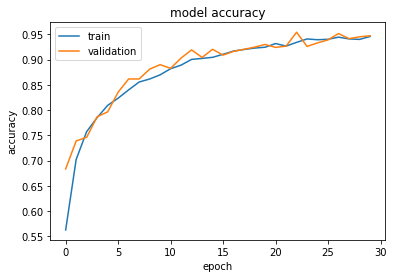

In [20]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

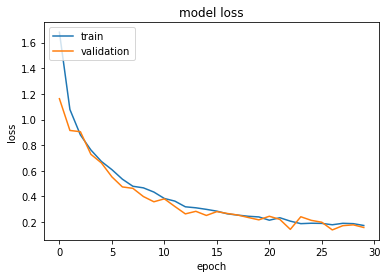

In [21]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [22]:
predictions = model.predict_generator(test_set,steps=31)

In [23]:
val_preds = np.argmax(predictions, axis=-1)

In [24]:
val_trues = test_set.classes

In [25]:
labels = test_set.class_indices.keys()

In [26]:
print(classification_report(val_trues, val_preds, target_names=labels))

                          precision    recall  f1-score   support

  abraham_grampa_simpson       1.00      0.94      0.97        48
           agnes_skinner       1.00      0.98      0.99        50
  apu_nahasapeemapetilon       0.96      0.98      0.97        50
           barney_gumble       0.81      0.98      0.89        48
            bart_simpson       0.94      0.96      0.95        50
           bumblebee_man       0.98      0.96      0.97        49
            carl_carlson       0.96      0.98      0.97        50
charles_montgomery_burns       0.00      0.00      0.00         0
            chief_wiggum       0.94      0.90      0.92        50
         cletus_spuckler       1.00      0.98      0.99        50
          comic_book_guy       0.98      0.96      0.97        50
               disco_stu       1.00      0.88      0.94        50
          edna_krabappel       1.00      0.90      0.95        50
                fat_tony       1.00      0.96      0.98        50
         

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 22, does not match size of target_names, 47
  .format(len(labels), len(target_names))
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
